In [1]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import growth_simulations as g
import weakref
import scipy.optimize

/home/felix/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
%load_ext autoreload 

In [3]:
%autoreload 2

In [55]:
td = [np.log(2), np.log(2)]
td_std = [0.15, 0.15]
# td = [1.0, 1.0]
# td_std = [0.1, 0.1]

# this script uses a simple adder model

par1 = {'nstep': 1000, 'dt':0.01, 'td': td, 'td_std': td_std, 'v_init':1.0, 'modeltype':1, 'delta':1.0, 
        'lambda_std':None, 'alpha':0.5}
# par1['lambda'] = scipy.optimize.fsolve(g.fn_1, x0=np.log(2.0) / np.mean(td), args=(par1['td'][0], par1['td'][1]))[0]
# temp = 0.5/(np.exp(par1['lambda']*par1['td'][1])-1)
# par1['r'] = temp/(1-temp)
par1['r']=1.0
par1['lambda']=1.0

In [59]:
par1['lambda_std']=None
par1['td_std'] = [0.05, 0.05]
init_pop = g.starting_popn(par1)
c,obs = g.discr_time_1(par1, init_pop)
# temp1 = scipy.stats.linregress(obs[1][400:], np.log(obs[4][400:]))
temp2 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
print temp2[0]

1.0


In [61]:
par1['lambda_std']=None
par1['td_std'] = [0.25, 0.25]
v=[]
for i0 in range(10):
    init_pop = g.starting_popn(par1)
    c,obs = g.discr_time_1(par1, init_pop)
    # temp1 = scipy.stats.linregress(obs[1][400:], np.log(obs[4][400:]))
    temp2 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
    print temp2[0]
    v.append(temp2[0])

0.998950214656
0.999170304759
0.999114192118
0.999145874679
0.999151705096
0.999148385452
0.998942314274
0.999197492242
0.999103951305
0.999056240751


In [39]:
temp1 = [obj.t_grow for obj in c[10**4:]]
temp2 = [obj.parent.t_grow for obj in c[10**4:]]
scipy.stats.pearsonr(temp1, temp2)

(-0.13163340589185768, 0.0)

In [22]:
temp2[0]

1.0000000000000002

In [56]:
l_std = np.linspace(0.0, 0.15, 10)
td_std_vals = [0.09, 0.15]

# vals = np.zeros([8,15])
gr = np.zeros([2,10])
for i0 in range(len(l_std)):
    if i0==0:
        par1['lambda_std']=None
    else:
        par1['lambda_std']=l_std[i0]
    init_pop = g.starting_popn(par1)
    c,obs = g.discr_time_1(par1, init_pop)
    temp1 = scipy.stats.linregress(obs[1][400:], np.log(obs[4][400:]))
    temp2 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
    gr[0,i0] = temp1[0]
    gr[1,i0] = temp2[0]
    print 'finished {0}'.format(i0)

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9


In [52]:
scipy.special.erf(1.0)

0.84270079294971478

In [8]:
def l_fn(vals, l):
    return l*(1.0-(1.0-np.log(2)/2.0)*(vals/l)**2)

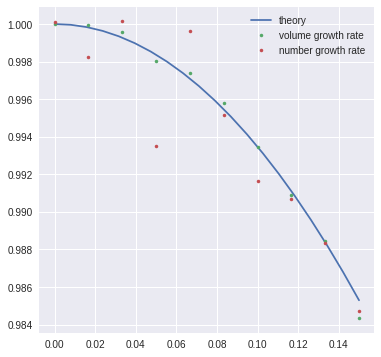

In [57]:
fig=plt.figure(figsize=[6,6])
l_std1 = np.linspace(0.0, 0.15, 20)
plt.plot(l_std1, l_fn(l_std1, 1.0), '-', label='theory')
plt.plot(l_std, gr[1, :10], '.', label='volume growth rate')
plt.plot(l_std, gr[0, :10], '.', label='number growth rate')
plt.legend()
plt.show()

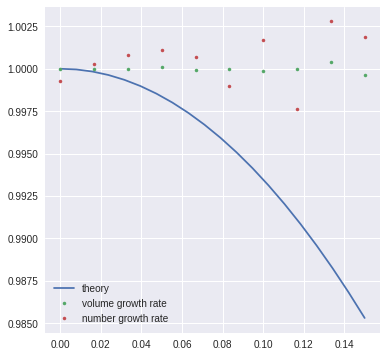

In [12]:
fig=plt.figure(figsize=[6,6])
l_std1 = np.linspace(0.0, 0.15, 20)
plt.plot(l_std1, l_fn(l_std1, 1.0), '-', label='theory')
plt.plot(l_std, gr[1, :10], '.', label='volume growth rate')
plt.plot(l_std, gr[0, :10], '.', label='number growth rate')
plt.legend()
plt.show()

In [64]:
l_std = 0.2
td_std_vals = np.linspace(0.1, 0.2, 6)

# vals = np.zeros([8,15])
gr = np.zeros([6,10])
par1['lambda_std']=l_std
for i0 in range(len(td_std_vals)):
    par1['td_std']=[td_std_vals[i0],td_std_vals[i0]]
    for i1 in range(10):
        init_pop = g.starting_popn(par1)
        c,obs = g.discr_time_1(par1, init_pop)
    #     temp1 = scipy.stats.linregress(obs[1][400:], np.log(obs[4][400:]))
        temp2 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
        gr[i0, i1] = temp2[0]
    print 'finished {0}'.format(i0)

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5


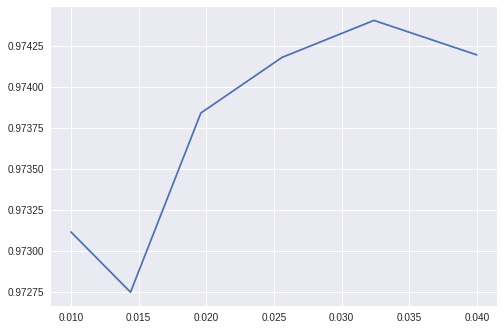

In [65]:
plt.plot(td_std_vals**2, np.mean(gr, axis=1))
plt.show()